### dset check
1. check pair-wise image and truth 
2. check the distribution of the dset. 

In [1]:
import glob
import numpy as np
import rasterio as rio 
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from shapely.geometry import Point
from utils.imgShow import imsShow
from utils.transform_xy import coor2coor


In [2]:
### get the labeled landsat images
paths_truth = sorted(glob.glob('data/dset-l5789/truth/*_truth.tif'))
paths_scene = [path_truth.replace('_truth.tif', '.tif').replace('truth','scene') for path_truth in paths_truth]
names_satellite = [path_truth.split('/')[-1][0:2] for path_truth in paths_truth]
print('Number of scenes:', len(paths_scene))
print('Satellite:', names_satellite[0])


Number of scenes: 76
Satellite: l5


#### 1. Check the pair-wise sence and truth images


data/dset-l5789/scene/l5_scene_01.tif


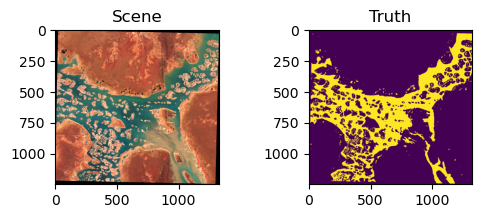

data/dset-l5789/scene/l5_scene_02.tif


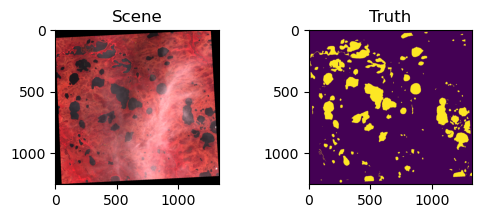

data/dset-l5789/scene/l5_scene_03.tif


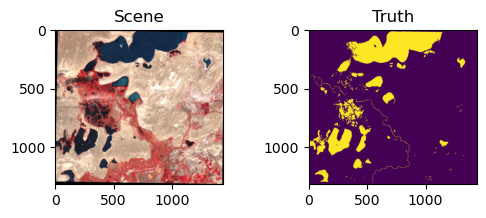

In [3]:
for id_scene in range(len(paths_scene[0:3])):
        # id_scene = 0
        print(paths_scene[id_scene])
        # print(paths_truth[id_scene])
        scene_rio = rio.open(paths_scene[id_scene])
        truth_rio = rio.open(paths_truth[id_scene])
        scene_truth_arr = [scene_rio.read([2,3,4]).transpose(1,2,0), truth_rio.read(1)]
        imsShow(img_list=scene_truth_arr,
                img_name_list=['Scene', 'Truth'], figsize=(6,2))
        plt.show()


#### 2. check the distribution of the dataset


In [4]:
### Get center coordinates (wgs84) of the landsat scenes
centroids_wgs84 = []
for path_truth in paths_truth:
    truth_rio = rio.open(path_truth)
    bounds_truth = truth_rio.bounds
    centroid_lon, centroid_lat= (bounds_truth.left + bounds_truth.right) / 2, (bounds_truth.bottom + bounds_truth.top) / 2
    if truth_rio.crs.to_epsg() != 4326:
        centroid_lon, centroid_lat = coor2coor(crs_from= truth_rio.crs.to_epsg(), crs_to= 4326, x=centroid_lon, y=centroid_lat)
    centroids_wgs84.append(Point([centroid_lon, centroid_lat]))         # 

print('number of centroids:',len(centroids_wgs84))



number of centroids: 76


In [5]:
dset_gpd = gpd.GeoDataFrame({'satellite':names_satellite}, geometry=centroids_wgs84, crs=4326)
dset_gpd.head()


,satellite,geometry
0,l5,POINT (119.57033 -29.09508)
1,l5,POINT (66.38172 59.88045)
2,l5,POINT (61.77405 46.04538)
3,l5,POINT (125.44204 63.95033)
4,l5,POINT (113.91513 22.58016)


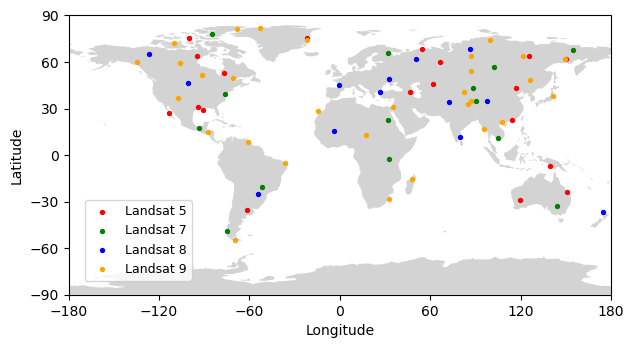

In [6]:
fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.PlateCarree()})
sat_colors = {'l5': 'red', 'l7': 'green', 'l8': 'blue', 'l9': 'orange'}
ax.add_feature(ccrs.cartopy.feature.LAND, facecolor='lightgray')
ax.set_extent([-180, 180, -90, 90])
for sat, color in sat_colors.items():
    dset_gpd[dset_gpd.satellite == sat].plot(ax=ax, marker='o', markersize=8, color=color, label=f'Landsat {sat[-1]}')
ax.legend(loc=(0.03,0.05), fontsize=9)
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
ax.tick_params(labelsize=10)


In [ ]:
# path_fig = 'figures/dset_distribution.png'
# fig.savefig(path_fig)

